In [16]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [17]:
# Define variables:
signal_name = 'solidremote'
filename = './solidremote_433_8000000_1'
samp_rate = 8e6
center_freq = 433e6
# load data into variable - take a second or two for 400MB file
dat = np.fromfile(filename, dtype="complex64")

In [18]:
# what it generally looks like

samp_rate = Fs = 8e6
# so I can mnake my adjustmens in seconds
lefts = int(samp_rate*1.505)
rights = int(lefts + samp_rate*.11)

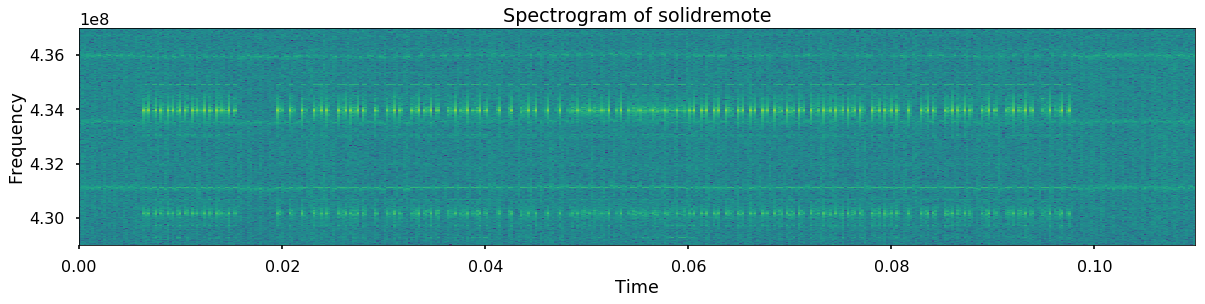

In [19]:
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(dat[lefts:rights], NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Spectrogram of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()

In [20]:
# The number of samples divided by sample rate (samps/sec) should give us the sample length (in seconds)
len(dat) / samp_rate

6.34080975

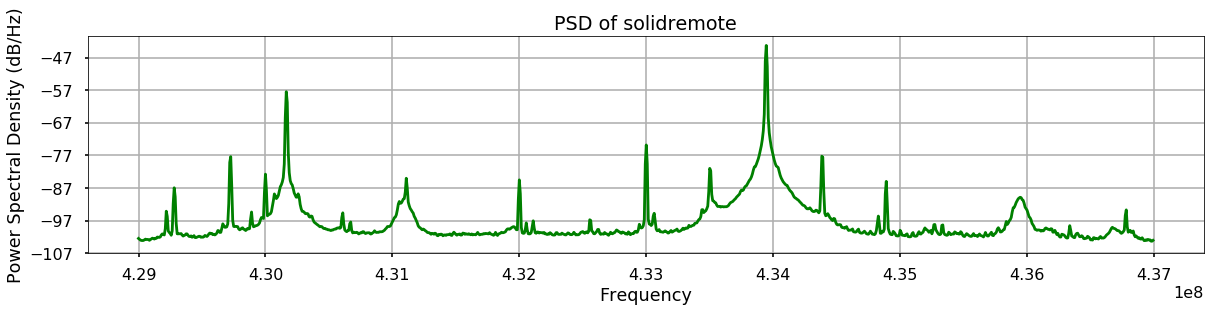

In [21]:
# now the sample is smaller, and it's Power Specrat Density looks like this
plt.figure(figsize=(20,4))
plt.title("PSD of "+signal_name)
plt.psd(cent_dat, NFFT=1024, Fs=samp_rate, Fc=center_freq, color="green")
plt.show()

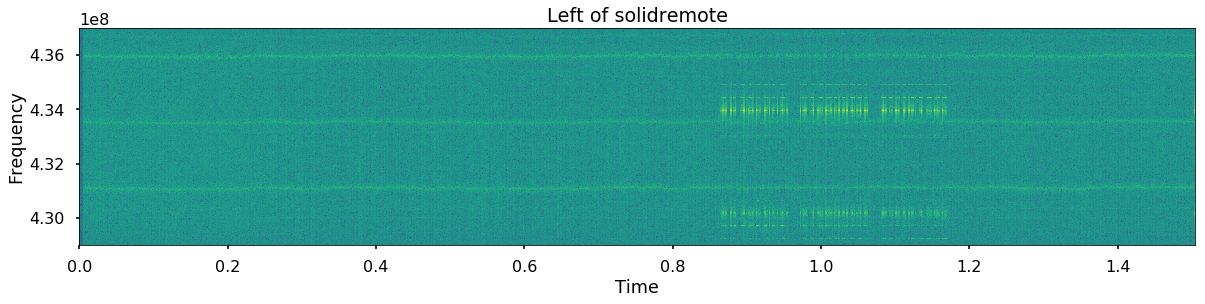

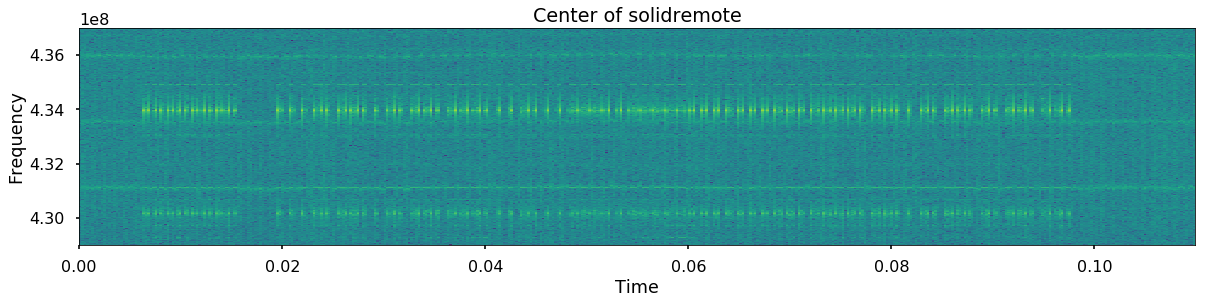

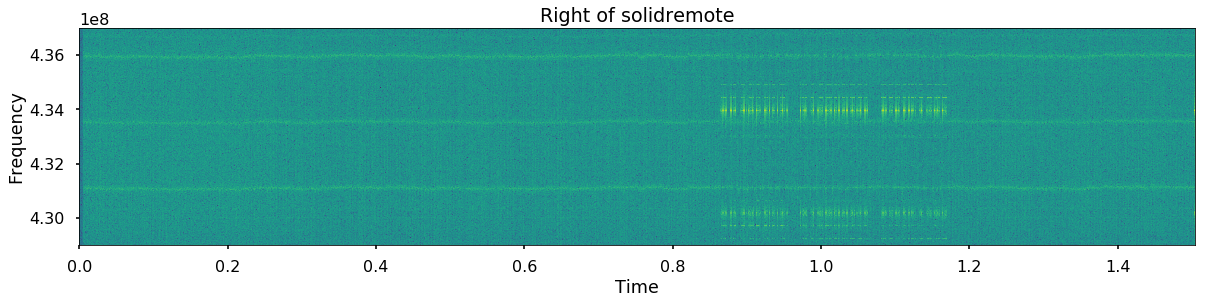

In [22]:
# this also means we can slice this data to predicably 
# concatenate the sample to the part that is interesting, before further processing
left = int(samp_rate*1.505)
right = int(left+samp_rate*.11)
left_dat = dat[:left]
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(left_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Left of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()
# this also means we can slice this data to predicably 
# concatenate the sample to the part that is interesting, before further processing
cent_dat = dat[left:right]
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(cent_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Center of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()
# this also means we can slice this data to predicably 
# concatenate the sample to the part that is interesting, before further processing
right_dat = dat[right:]
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(left_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Right of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()

In [23]:
# shift the signal I want to center

shift = 950000
# To mix the data down, generate a complex exponential 
# with phase -f_shift/Fs
fc = np.exp(-1.0j*2.0*np.pi* shift/Fs*np.arange(len(cent_dat)))
# Try plotting this complex exponential with a scatter plot of the complex plan - 
# what do you expect it to look like?
shifted_data = cent_dat * fc


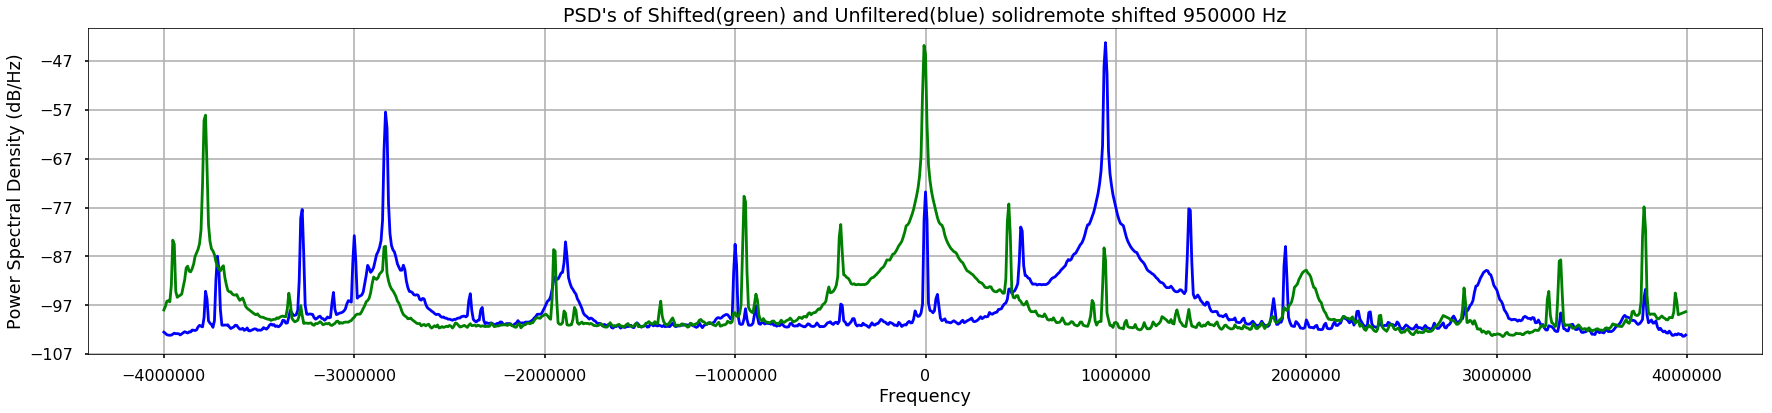

In [27]:
plt.figure(figsize=(30,6))
plt.style.use('seaborn-poster')
plt.psd(cent_dat, NFFT=1024, Fs=samp_rate, color="blue")  # original
plt.psd(shifted_data, NFFT=1024, Fs=samp_rate, color="green")  # shifted
plt.title("PSD's of Shifted(green) and Unfiltered(blue) " + signal_name + " shifted " + str(shift) + " Hz")
# plt.savefig(signal_name+"_psd.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show() 


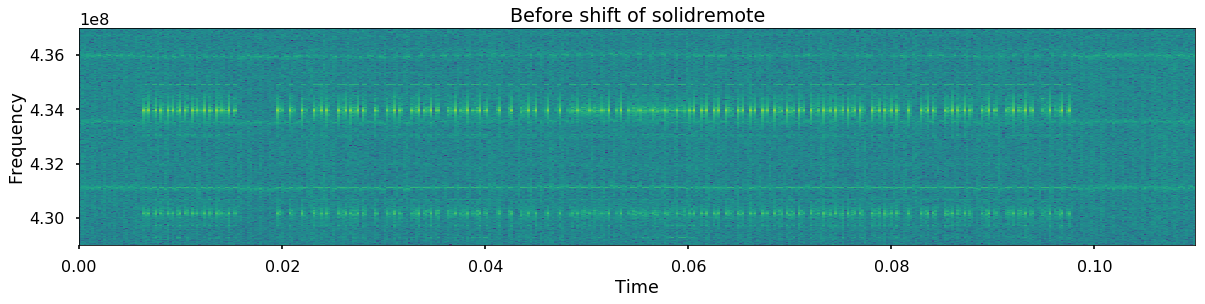

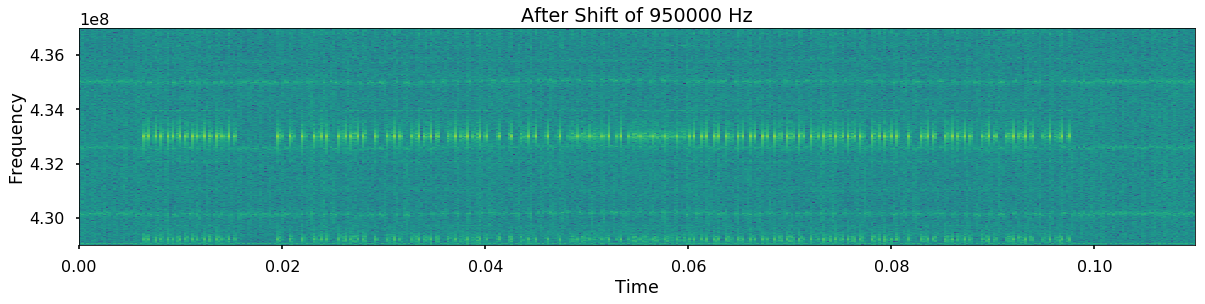

In [28]:
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(cent_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Before shift of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(shifted_data, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("After Shift of "+ str(shift) + " Hz")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()

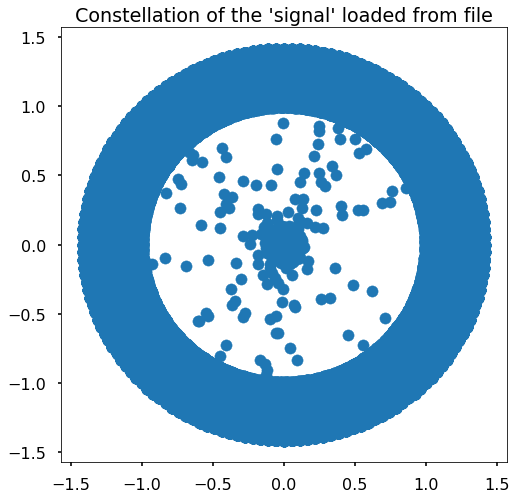

In [29]:
# And let's look at it on the complex plane (constellation)
# Note that showing *every* data point would be time- and processing-intensive
# so we'll just show a few
plt.figure(figsize=(8,8))
plt.scatter(np.real(shifted_data[200000:300000]), np.imag(shifted_data[200000:300000]))
plt.title("Constellation of the 'signal' loaded from file")
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show() 

In [31]:
# push the filtered and sliced sampels back out to a file
shifted_data.tofile(filename+'.cut.shifted.iq')
cent_dat.tofile(filename+'.cut.iq')

In [37]:
# Post GNURadio processing --- call a seperate script?
# Define variables:
signal_name = 'Solid_sliced'
filename = '../../pinode_notes/working/Rx.sliced'
samp_rate = 4e5
center_freq = 433e6
# load data into variable - take a second or two for 400MB file
dat = np.fromfile(filename, dtype="float32")

In [38]:
dat

array([ 0.,  0.,  0., ...,  1.,  1.,  0.], dtype=float32)

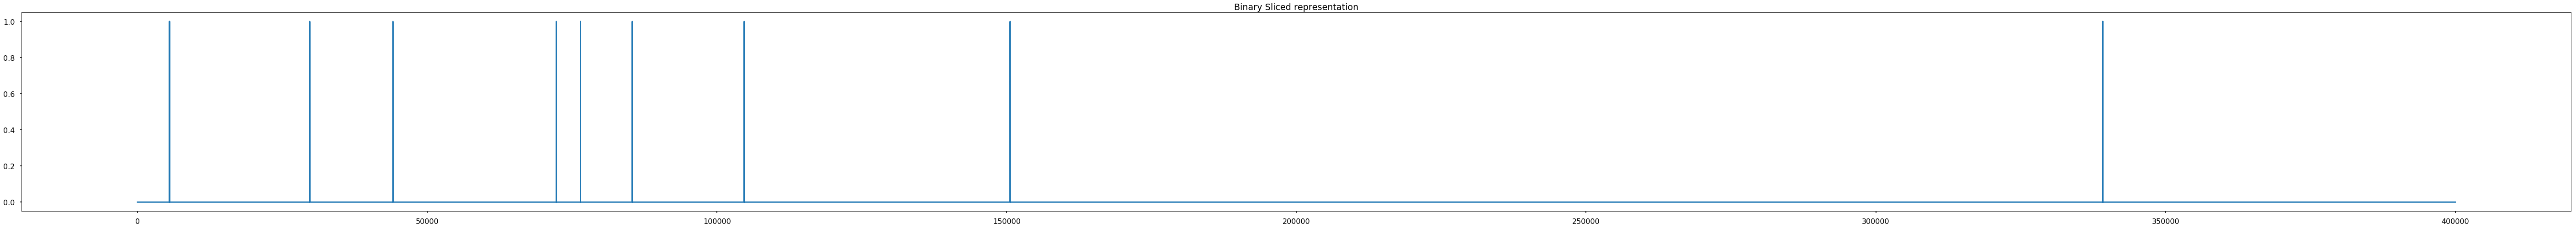

In [40]:
# the x axis will be each value --
# so I can mnake my adjustmens in seconds
lefts= int(samp_rate*.01)
rights = int(lefts + samp_rate*1)

lefty = lefts
righty = rights
x = range(len(dat[lefty:righty]))
# the y axis is dat 
plt.figure(figsize=(100,8))
#plt.scatter(x,dat[lefty:righty])
plt.plot(x,dat[lefty:righty])
plt.title("Binary Sliced representation")
#plt.savefig(signal_name+"_sliced-check.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show() 

/mnt/hgfs/share/SDRLabs/sdr-labs-robodojo


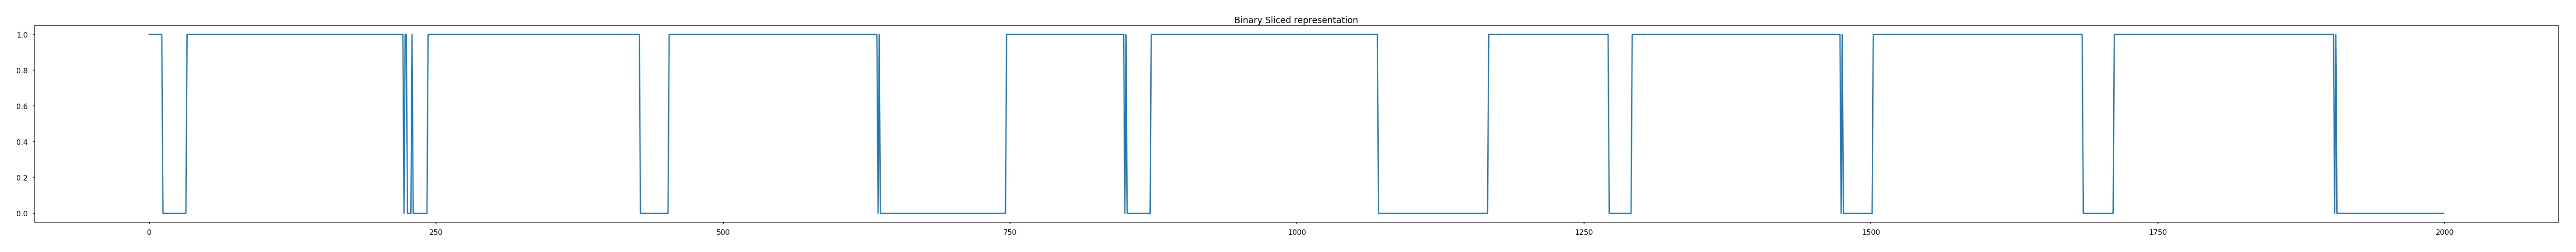

In [45]:
from IPython.display import Image
Image(filename="./Doorbell_sliced_sliced.jpg")